In [9]:
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pandas as pd
import os 
import json


In [13]:
current_path = os.getcwd()  

In [14]:
current_path = os.path.dirname(os.path.abspath(__file__))

NameError: name '__file__' is not defined

In [15]:

config_path = os.path.join(current_path, '../config.json')
with open(config_path, 'r') as f:
    config = json.load(f)

In [2]:
df = pd.DataFrame()

dfAux = pd.read_csv('./dummy/dfPredictions.csv')
dfAux['error_dummy'] = abs(dfAux['Predict'] - dfAux['Real'])
dfAux.rename(columns={'Predict': f'Predict_dummy', 'Real': f'Real_dummy'}, inplace=True)
dfAux.set_index(['LastTimeWithData', 'ti', 'Time'], inplace=True)
print(dfAux.shape)
df = pd.concat([df, dfAux], axis=1, join='outer')

dfAux = pd.read_csv('./avg/dfPredictions.csv')
dfAux['error_avg'] = abs(dfAux['Predict'] - dfAux['Real'])
dfAux.rename(columns={'Predict': f'Predict_avg', 'Real': f'Real_avg'}, inplace=True)
dfAux.set_index(['LastTimeWithData', 'ti', 'Time'], inplace=True)
print(dfAux.shape)
df = pd.concat([df, dfAux], axis=1, join='outer')

dfAux = pd.read_csv('./rnn/dfPredictions.csv')
dfAux['error_rnn'] = abs(dfAux['Predict'] - dfAux['Real'])
dfAux.rename(columns={'Predict': f'Predict_rnn', 'Real': f'Real_rnn'}, inplace=True)
dfAux.set_index(['LastTimeWithData', 'ti', 'Time'], inplace=True)
print(dfAux.shape)
df = pd.concat([df, dfAux], axis=1, join='outer')

dfAux = pd.read_csv('./rnn_by_time/dfPredictions.csv')
dfAux['error_rnn_by_time'] = abs(dfAux['Predict'] - dfAux['Real'])
dfAux.rename(columns={'Predict': f'Predict_rnn_by_time', 'Real': f'Real_rnn_by_time'}, inplace=True)
dfAux.set_index(['LastTimeWithData', 'ti', 'Time'], inplace=True)
print(dfAux.shape)
df = pd.concat([df, dfAux], axis=1, join='outer')



(2007, 3)
(2007, 3)
(2007, 3)
(2007, 3)


In [3]:
print ("Must be empty")
df[df[['Real_dummy', 'Real_avg', 'Real_rnn', 'Real_rnn_by_time']].nunique(axis=1) > 1]

Must be empty


,,,Predict_dummy,Real_dummy,error_dummy,Predict_avg,Real_avg,error_avg,Predict_rnn,Real_rnn,error_rnn,Predict_rnn_by_time,Real_rnn_by_time,error_rnn_by_time
LastTimeWithData,ti,Time,,,,,,,,,,,,


In [4]:
df['Real'] = df['Real_dummy'] 
df.drop(columns=['Real_dummy', 'Real_avg', 'Real_rnn', 'Real_rnn_by_time'], inplace=True)


In [5]:
df = df.reset_index()
df['LastTimeWithData'] = pd.to_datetime(df['LastTimeWithData'])
df['Time'] = pd.to_datetime(df['Time'])
df = df.sort_values(by=['LastTimeWithData', 'Time'])

In [6]:
df.groupby(['ti']).agg({
    'error_dummy': 'sum',
    'error_avg': 'sum',
    'error_rnn': 'sum',
    'error_rnn_by_time': 'sum'
}).reset_index()

,ti,error_dummy,error_avg,error_rnn,error_rnn_by_time
0,1,473.0,722.500000,492.017976,467.962169
1,2,648.0,819.388889,679.702147,596.261037
2,3,778.0,916.847222,835.314977,676.244967
3,4,886.0,1005.087191,958.323233,680.954443
4,5,985.0,1088.148020,1080.433920,728.131057
5,6,1094.0,1180.458033,1177.263438,754.799399


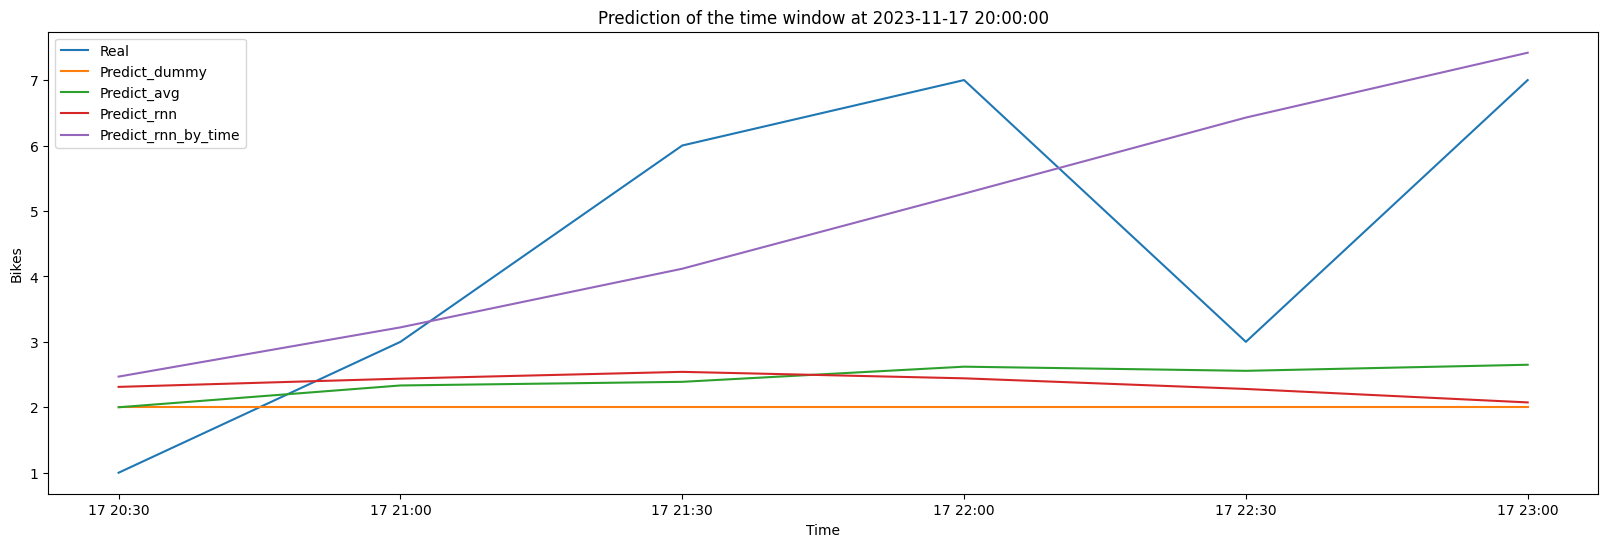

In [8]:
dt = datetime(2023, 11, 17, 20, 0, 0)
name_model = 'Dummy'
dfPlot = df[df['LastTimeWithData']==dt]

plt.figure(figsize=(20, 6))
plt.plot(dfPlot['Time'], dfPlot['Real'], label='Real')
plt.plot(dfPlot['Time'], dfPlot['Predict_dummy'], label='Predict_dummy')
plt.plot(dfPlot['Time'], dfPlot['Predict_avg'], label='Predict_avg')
plt.plot(dfPlot['Time'], dfPlot['Predict_rnn'], label='Predict_rnn')
plt.plot(dfPlot['Time'], dfPlot['Predict_rnn_by_time'], label='Predict_rnn_by_time')

plt.title(f'Prediction of the time window at {dt}')
plt.xlabel('Time')
plt.ylabel('Bikes')

plt.legend()
plt.show()

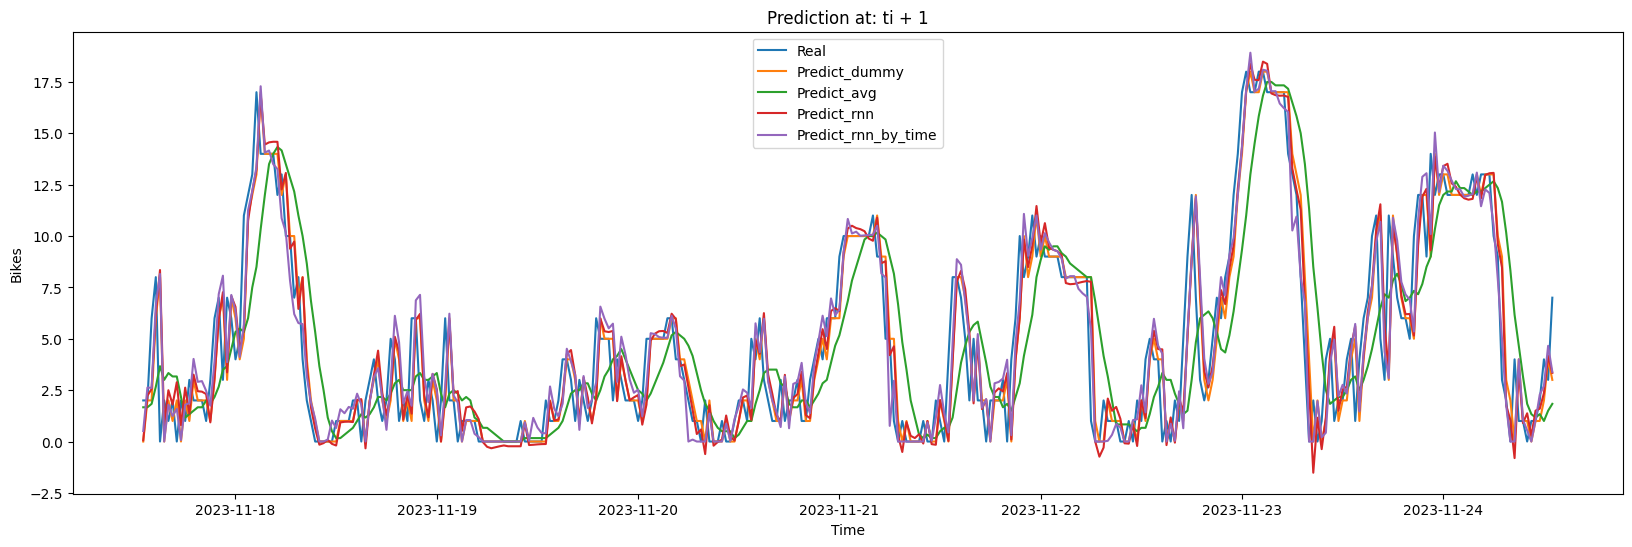

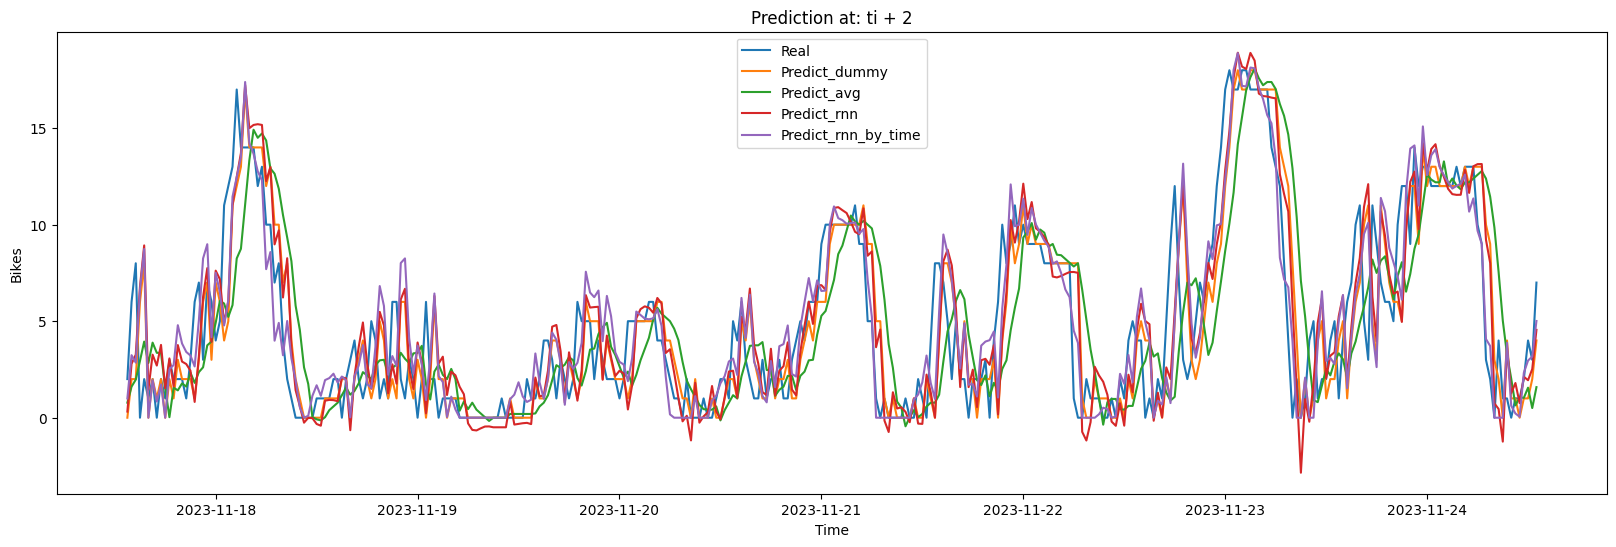

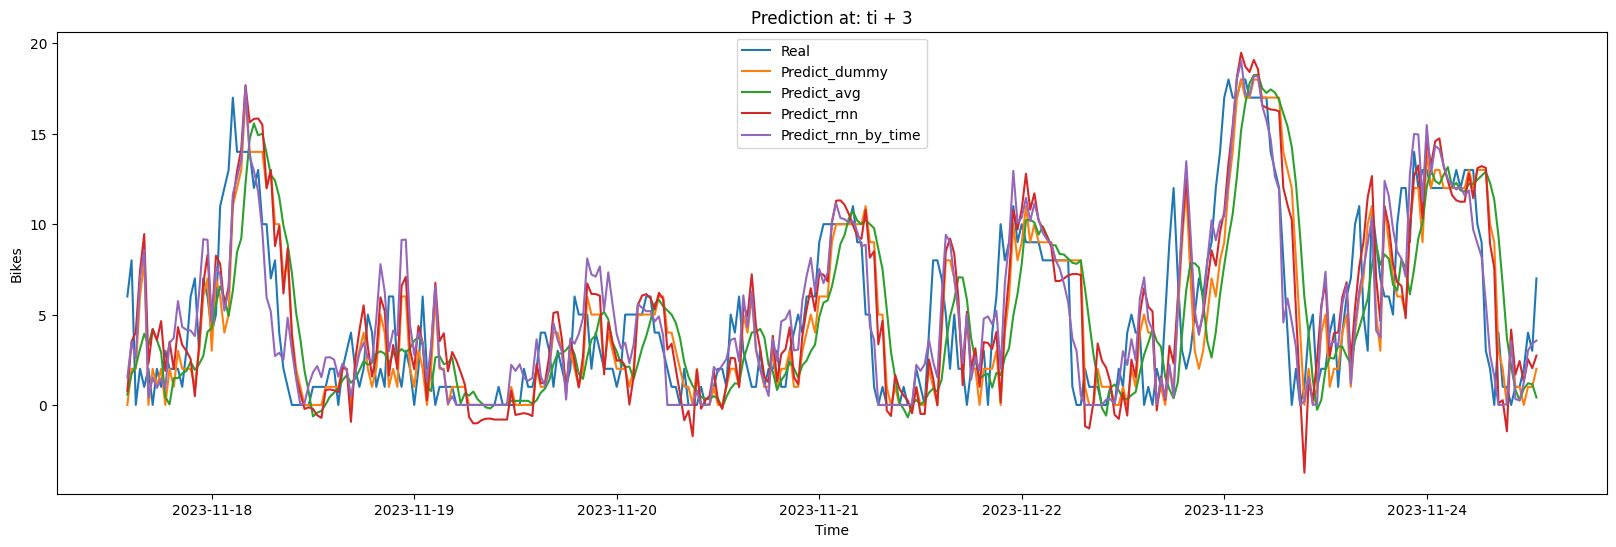

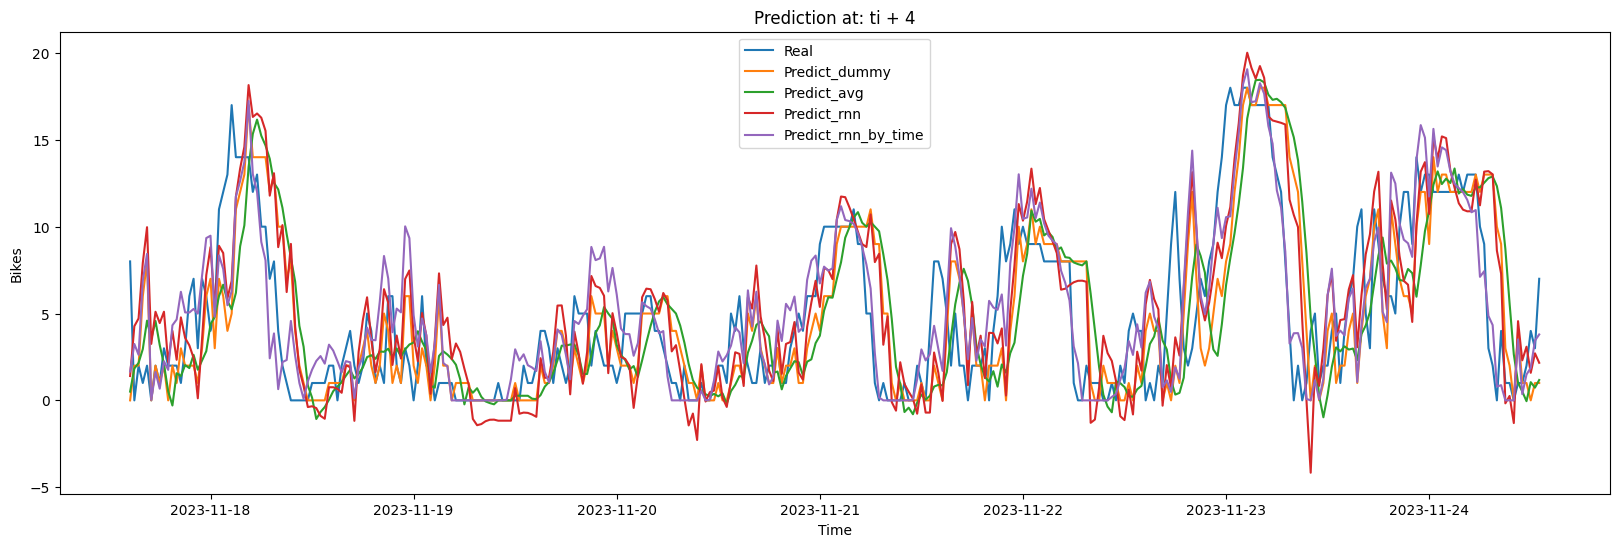

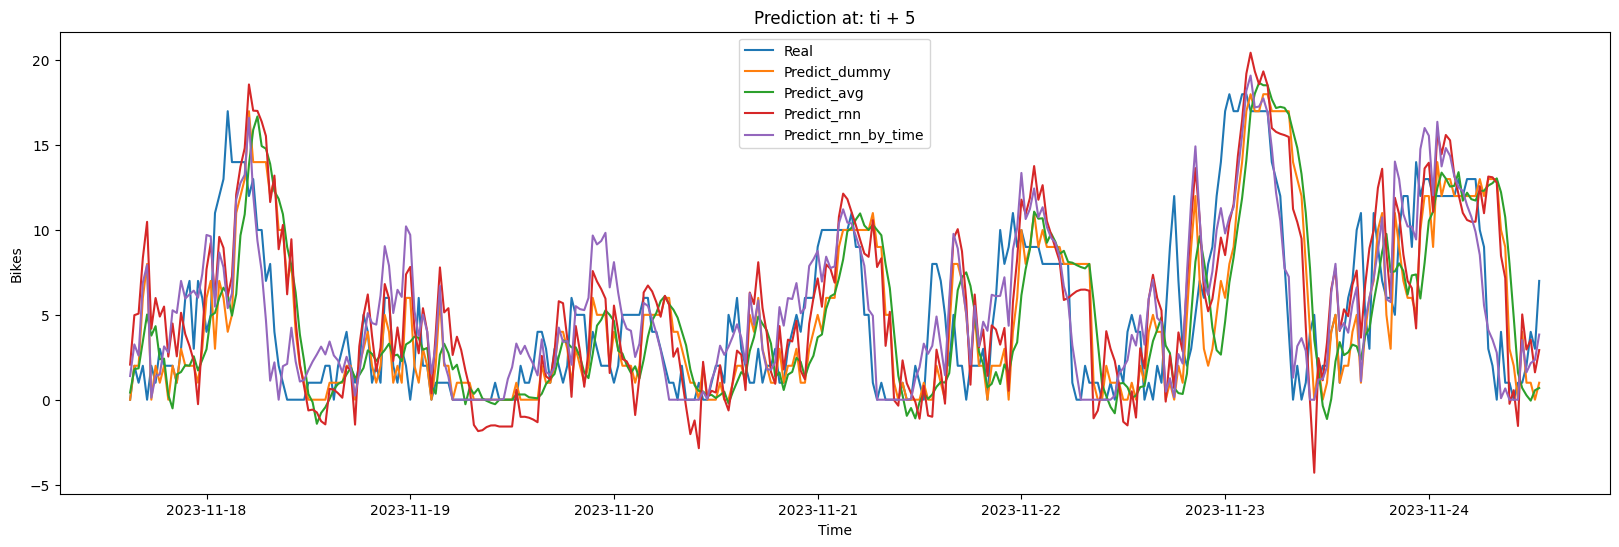

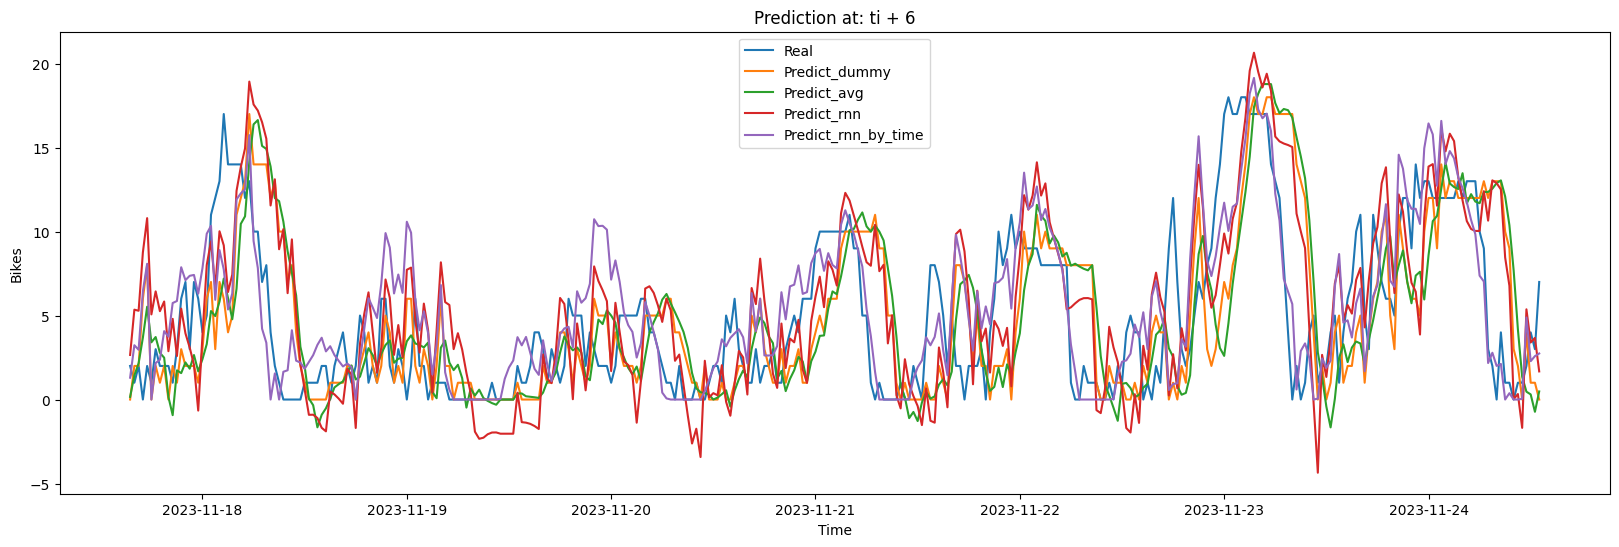

In [18]:

for ti in range(1, config['prediction_window'] + 1):
    dfPlot = df[df['ti'] == ti]

    plt.figure(figsize=(20, 6))
    plt.plot(dfPlot['Time'], dfPlot['Real'], label='Real')
    plt.plot(dfPlot['Time'], dfPlot['Predict_dummy'], label='Predict_dummy')
    plt.plot(dfPlot['Time'], dfPlot['Predict_avg'], label='Predict_avg')
    plt.plot(dfPlot['Time'], dfPlot['Predict_rnn'], label='Predict_rnn')
    plt.plot(dfPlot['Time'], dfPlot['Predict_rnn_by_time'], label='Predict_rnn_by_time')

    plt.title(f'Prediction at: ti + {ti}')
    plt.xlabel('Time')
    plt.ylabel('Bikes')
    
    plt.legend()
    plt.show()


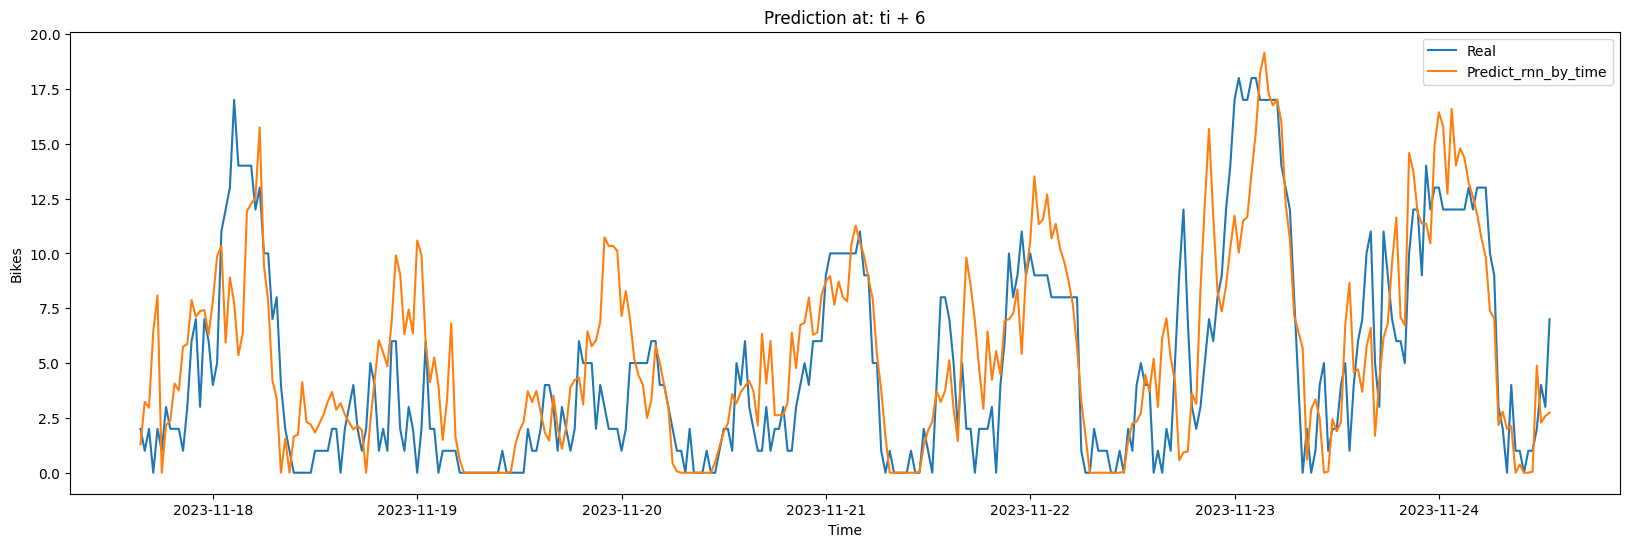

In [17]:
ti = 6
dfPlot = df[df['ti'] == ti]

plt.figure(figsize=(20, 6))
plt.plot(dfPlot['Time'], dfPlot['Real'], label='Real')
plt.plot(dfPlot['Time'], dfPlot['Predict_rnn_by_time'], label='Predict_rnn_by_time')

plt.title(f'Prediction at: ti + {ti}')
plt.xlabel('Time')
plt.ylabel('Bikes')

plt.legend()
plt.show()
